In [64]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

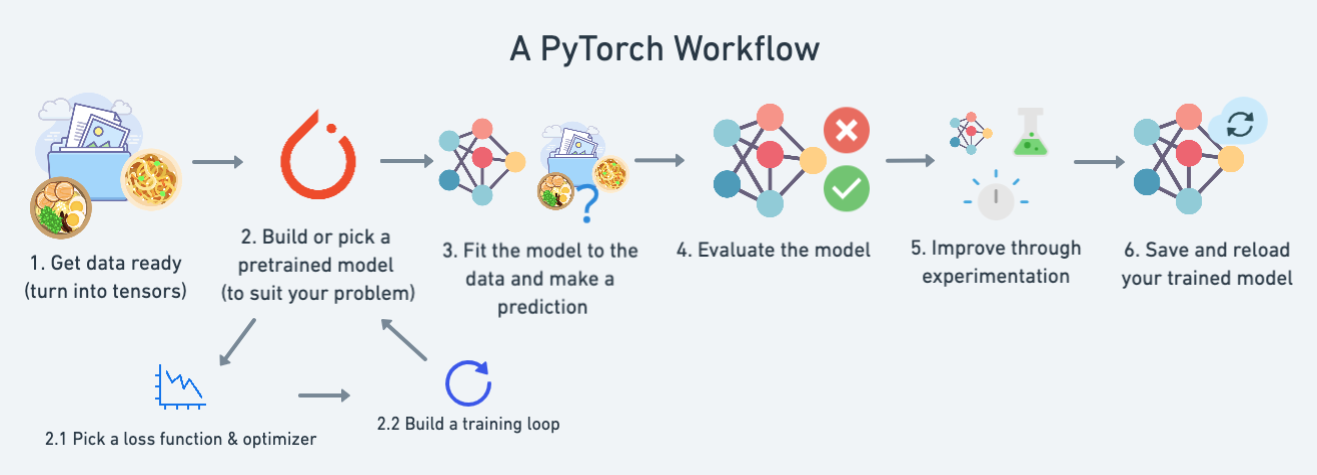

In [65]:
torch.__version__

'2.0.1+cu118'

In [66]:
X = torch.arange(0,1,0.02,dtype=torch.float)
w = 0.3
b = 0.1
y = X*w+b
y

tensor([0.1000, 0.1060, 0.1120, 0.1180, 0.1240, 0.1300, 0.1360, 0.1420, 0.1480,
        0.1540, 0.1600, 0.1660, 0.1720, 0.1780, 0.1840, 0.1900, 0.1960, 0.2020,
        0.2080, 0.2140, 0.2200, 0.2260, 0.2320, 0.2380, 0.2440, 0.2500, 0.2560,
        0.2620, 0.2680, 0.2740, 0.2800, 0.2860, 0.2920, 0.2980, 0.3040, 0.3100,
        0.3160, 0.3220, 0.3280, 0.3340, 0.3400, 0.3460, 0.3520, 0.3580, 0.3640,
        0.3700, 0.3760, 0.3820, 0.3880, 0.3940])

In [67]:
X.shape, y.shape

(torch.Size([50]), torch.Size([50]))

In [68]:
split = int(0.9*len(X))
split

45

In [69]:
Xtrain, Xtest, ytrain, ytest = X[:split], X[split:], y[:split], y[split:]

In [70]:
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

(torch.Size([45]), torch.Size([45]), torch.Size([5]), torch.Size([5]))

In [71]:
def plot_predictions(train_data=Xtrain,
                    train_labels=ytrain,
                    test_data=Xtest,
                    test_labels=ytest,
                    predictions=None):

      plt.figure(figsize=(10, 7))

      # Plot training data in blue
      plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

      # Plot test data in green
      plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

      if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

      # Show the legend
      plt.legend(prop={"size": 14});

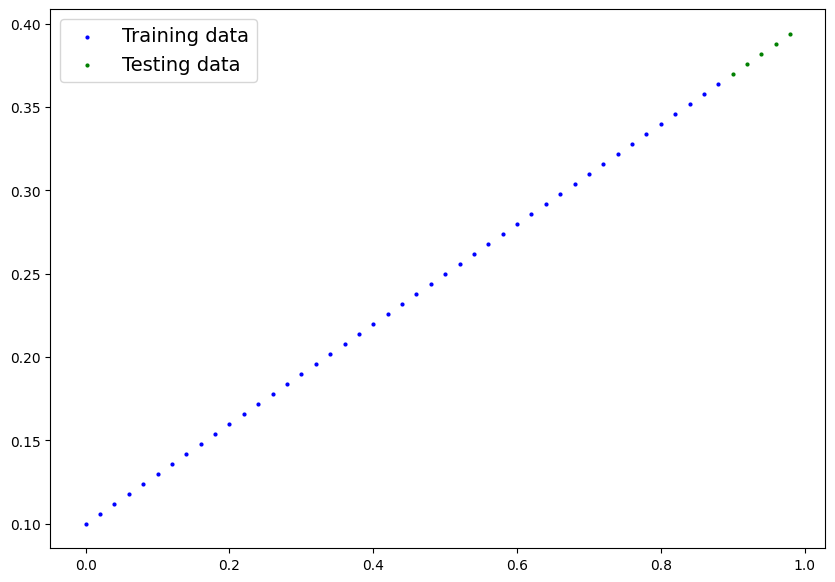

In [72]:
plot_predictions()

In [73]:
torch.manual_seed(42)
class LinearRegression(nn.Module):
    def __init__(self):
      super(LinearRegression,self).__init__()
      self.W = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
      self.b = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

    def forward(self, x):
      output = x*self.W+self.b
      return output

In [74]:
model = LinearRegression()
model

LinearRegression()

In [75]:
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [76]:
model.state_dict()

OrderedDict([('W', tensor([0.3367])), ('b', tensor([0.1288]))])

In [77]:
with torch.inference_mode():
  ypred = model(Xtest)

ypred.shape

torch.Size([5])

In [78]:
print(f"Number of testing samples: {len(Xtest)}")
print(f"Number of predictions made: {len(ypred)}")
print(f"Predicted values:\n{ypred}")

Number of testing samples: 5
Number of predictions made: 5
Predicted values:
tensor([0.4318, 0.4386, 0.4453, 0.4520, 0.4588])


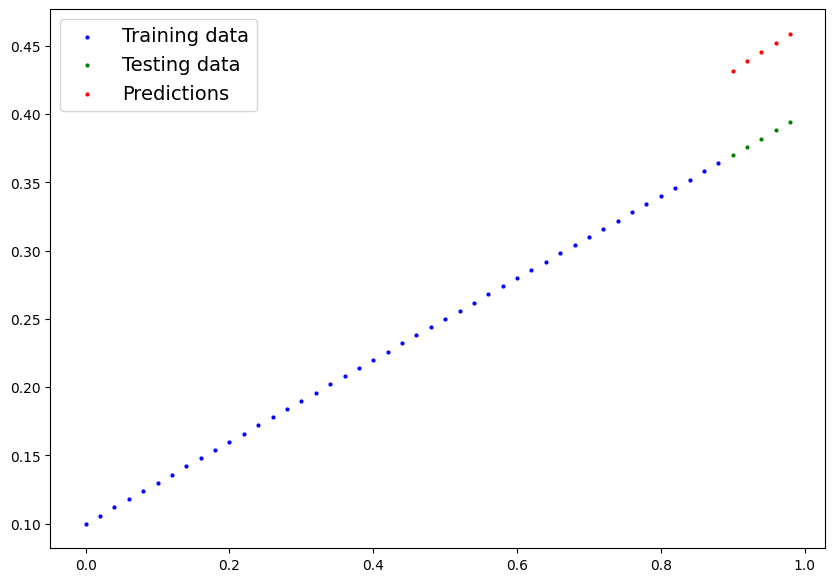

In [79]:
plot_predictions(predictions=ypred)

In [80]:
opt = torch.optim.SGD(model.parameters(), lr=0.001)
loss_fn = torch.nn.L1Loss()

In [81]:
opt, loss_fn

(SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     lr: 0.001
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ),
 L1Loss())

In [82]:
torch.manual_seed(42)
epochs = 100

epoch_cnt, tr_loss, ts_loss = [], [], []

for epoch in range(epochs):
  # train
  model.train()

  opt.zero_grad()
  output = model(Xtrain)
  train_loss = loss_fn(output,ytrain)
  train_loss.backward()
  opt.step()

  # test
  model.eval()

  with torch.inference_mode():
    ypred = model(Xtest)
    test_loss = loss_fn(ypred,ytest)

  if epoch%10 == 0:
    epoch_cnt.append(epoch)
    tr_loss.append(train_loss.detach().numpy())
    ts_loss.append(test_loss.detach().numpy())

  print(f"Epoch:{epoch+1}/{epochs} || MAE Train Loss: {train_loss} || MAE Test Loss: {test_loss}")

Epoch:1/100 || MAE Train Loss: 0.04495315998792648 || MAE Test Loss: 0.06188473850488663
Epoch:2/100 || MAE Train Loss: 0.04375956207513809 || MAE Test Loss: 0.060471147298812866
Epoch:3/100 || MAE Train Loss: 0.0425659604370594 || MAE Test Loss: 0.05905752629041672
Epoch:4/100 || MAE Train Loss: 0.041372355073690414 || MAE Test Loss: 0.05764392018318176
Epoch:5/100 || MAE Train Loss: 0.040178753435611725 || MAE Test Loss: 0.0562303252518177
Epoch:6/100 || MAE Train Loss: 0.03898514807224274 || MAE Test Loss: 0.05481671541929245
Epoch:7/100 || MAE Train Loss: 0.03779154643416405 || MAE Test Loss: 0.05340312793850899
Epoch:8/100 || MAE Train Loss: 0.03659794107079506 || MAE Test Loss: 0.051989514380693436
Epoch:9/100 || MAE Train Loss: 0.03540433943271637 || MAE Test Loss: 0.050575919449329376
Epoch:10/100 || MAE Train Loss: 0.03421073779463768 || MAE Test Loss: 0.04916229844093323
Epoch:11/100 || MAE Train Loss: 0.03301713243126869 || MAE Test Loss: 0.04774870350956917
Epoch:12/100 || 

Note: Due to the random nature of machine learning, you will likely get slightly different
results (different loss and prediction values) depending on whether your model was
trained on CPU or GPU. This is true even if you use the same random seed on either
device. If the difference is large, you may want to look for errors, however, if it is small
(ideally it is), you can ignore it.

In [83]:
from pprint import pprint
print("The model learned the following values for weights and bias:")
pprint(model.state_dict())

The model learned the following values for weights and bias:
OrderedDict([('W', tensor([0.3075])), ('b', tensor([0.0964]))])


In [84]:
list(zip(epoch_cnt, tr_loss, ts_loss))

[(0, array(0.04495316, dtype=float32), array(0.06188474, dtype=float32)),
 (10, array(0.03301713, dtype=float32), array(0.0477487, dtype=float32)),
 (20, array(0.02108111, dtype=float32), array(0.03361266, dtype=float32)),
 (30, array(0.00927971, dtype=float32), array(0.01965692, dtype=float32)),
 (40, array(0.00463314, dtype=float32), array(0.01125213, dtype=float32)),
 (50, array(0.00381267, dtype=float32), array(0.008153, dtype=float32)),
 (60, array(0.00337725, dtype=float32), array(0.00686246, dtype=float32)),
 (70, array(0.00295742, dtype=float32), array(0.00589275, dtype=float32)),
 (80, array(0.00253998, dtype=float32), array(0.00505204, dtype=float32)),
 (90, array(0.00212253, dtype=float32), array(0.00421135, dtype=float32))]

In [85]:
# predict
model.eval()

with torch.inference_mode():
  print(model(1.21))

tensor([0.4685])


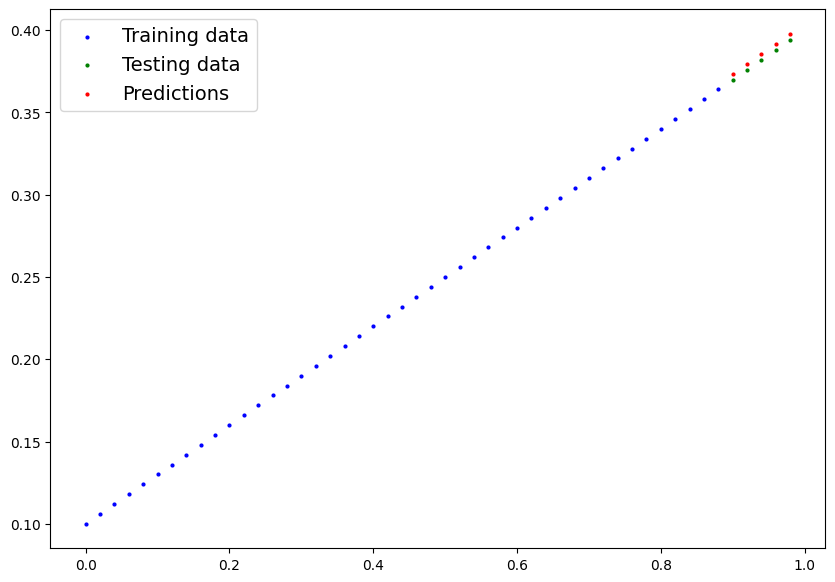

In [86]:
plot_predictions(predictions=ypred)

In [87]:
torch.save(model.state_dict(), "model_pt",)

In [88]:
model_ = LinearRegression()
model_.load_state_dict(torch.load("model_pt"))

<All keys matched successfully>

In [89]:


print(f"Loaded model:\n{model_}")
print(f"Model on device:\n{next(model_.parameters()).device}")

Loaded model:
LinearRegression()
Model on device:
cpu


In [90]:
model_.eval()

device = "cuda" if torch.cuda.is_available() else "cpu"
if device == torch.device("cuda"):
  model_ = model_.to("cuda")

with torch.inference_mode():
  print(model_(Xtest))

tensor([0.3732, 0.3793, 0.3855, 0.3916, 0.3978])


In [91]:
model.eval()

device = "cuda" if torch.cuda.is_available() else "cpu"
if device == torch.device("cuda"):
  model = model.to("cuda")

with torch.inference_mode():
  print(model(Xtest))

tensor([0.3732, 0.3793, 0.3855, 0.3916, 0.3978])
